In [1]:
%matplotlib inline
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
plt.rcParams['figure.figsize'] = (8, 4)

In [4]:
def interval(n, mean, std):
    low, high = st.t.interval(0.95, 100-1, loc=mean, scale=std)
    return low, high

def plot_bumps(bumps, order, color='green'):
    f, ax = plt.subplots(figsize=(8,len(bumps)/4))
    #plt.grid()
    a=ax.get_yticks().tolist()
    y = range(len(bumps))
    means = [np.mean(bumps[city]) for city in order]
    width = [np.max(bumps[city])-np.min(bumps[city]) for city in order]
    left = [np.min(bumps[city]) for city in order]
    labels = [x[x.find("_"):].replace("_", " ") for x in order]
    ax.barh(y, width,height=.25,left=left, tick_label = labels, alpha=.65, color=color)
    plt.xticks(fontsize= 20)
    mean_pos = [pos for pos in y]
    ax.scatter(means,mean_pos, s=5, color='black', facecolor='black', alpha=1)
    return f, ax
    

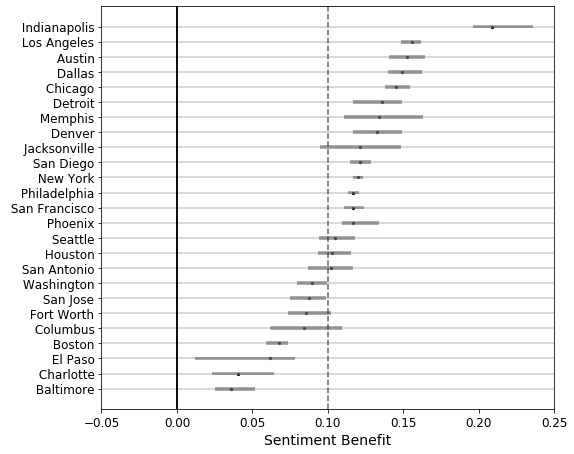

In [5]:
results_path = Path("results/bootstraps_0402/bootstrap_time.json")
with open(results_path) as f:
    results_time = json.load(f)

#results = {k:v['park_sentiment'] for k,v in results.items()}
time_bumps = {}
for city, vec in results_time.items():
    if 'Cleveland' not in city:
        time_bumps[city[:-13]] = [a_i - b_i for a_i, b_i in zip(vec['park_sentiment'],vec['control_sentiment'])]
        mean_time_bumps = {k:np.mean(v) for k,v in time_bumps.items()}
order = sorted(mean_time_bumps, key=mean_time_bumps.get, reverse=False)
f, ax = plot_bumps(time_bumps,order,'grey')
ax.set_xlim(-.05,.25);
ax.hlines(range(len(time_bumps)), -.05,.3, lw=.3)
#ax.set_title("Bump Range, 1 Tweet/User; \nControl Group: Random Tweet from same user;\n 80% users chosen 10 times");
ax.axvline(0, color='black');
plt.tight_layout()
plt.xticks(fontsize=12); 
plt.yticks(fontsize=12); 
ax.set_xlabel("Sentiment Benefit", fontsize=14)
ax.axvline(0, color='black');
ax.axvline(.10, color='black',ls='--',alpha=.6);
#ax.set_title("Bump Range, 1 Tweet/User; \nControl Group: Nearest Tweet in Time;\n 80% users chosen 10 times");
plt.savefig('figures/bumps_time.png')

In [6]:
mean_time_bumps

{'CO_Denver': 0.13243036763944768,
 'AZ_Phoenix': 0.11660085636176935,
 'FL_Jacksonville': 0.12164209815841058,
 'TX_Austin': 0.15252374294126048,
 'TX_Fort_Worth': 0.08582272371372487,
 'TX_El_Paso': 0.062020198202687206,
 'CA_San_Diego': 0.12135442894768414,
 'TN_Memphis': 0.133690805548361,
 'DC_Washington': 0.08983890776225527,
 'WA_Seattle': 0.10465291045996991,
 'IL_Chicago': 0.14543558255619474,
 'TX_Houston': 0.10300007125703817,
 'MA_Boston': 0.06766497379201945,
 'MI_Detroit': 0.13603250137190476,
 'NC_Charlotte': 0.040706049017911014,
 'NY_New_York': 0.1200034612694532,
 'IN_Indianapolis': 0.20854977601911368,
 'TX_San_Antonio': 0.10213766786856056,
 'TX_Dallas': 0.14893399574768873,
 'OH_Columbus': 0.08444807248489035,
 'PA_Philadelphia': 0.11670163020737956,
 'CA_Los_Angeles': 0.15555053506378053,
 'MD_Baltimore': 0.035547131107763086,
 'CA_San_Jose': 0.08758669806660127,
 'CA_San_Francisco': 0.11662452516944385}

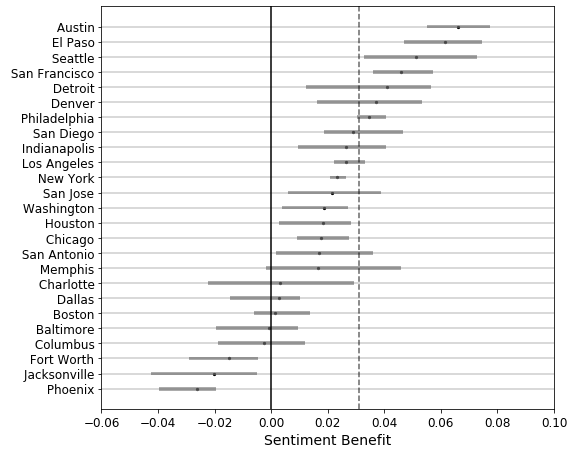

In [7]:
results_path = Path("results/bootstraps_0402/bootstrap_user2.json")
with open(results_path) as f:
    results_user = json.load(f)
    
#results = {k:v['park_sentiment'] for k,v in results.items()}
user_bumps = {}
for city, vec in results_user.items():
    if 'Cleveland' not in city:
        user_bumps[city[:-13]] = [a_i - b_i for a_i, b_i in zip(vec['park_sentiment'],vec['control_sentiment'])]
        mean_user_bumps = {k:np.mean(v) for k,v in user_bumps.items()}
order = sorted(mean_user_bumps, key=mean_user_bumps.get, reverse=False)
f, ax = plot_bumps(user_bumps,order, color="grey")
ax.set_xlim(-.06,.1);
ax.hlines(range(len(user_bumps)), -.06,.1, lw=.3)
#ax.set_title("Bump Range, 1 Tweet/User; \nControl Group: Random Tweet from same user;\n 80% users chosen 10 times");
ax.axvline(0, color='black');
ax.axvline(.031, color='black',ls='--',alpha=.6);
plt.tight_layout()
plt.xticks(fontsize=12); 
plt.yticks(fontsize=12); 
ax.set_xlabel("Sentiment Benefit", fontsize=14)
#plt.tick_params(labelright=True)
plt.savefig('./figures/bumps_user.png')
#tighter bars, lines across, labels on both sides

In [8]:
user_bump_means = {k:np.mean(v) for k,v in user_bumps.items()}
df_user = pd.DataFrame.from_dict(user_bump_means, 'index', columns=["mean_bump_user"])
df_user.index.set_names("city", inplace=True)
#df_user

In [9]:
time_bump_means = {k:np.mean(v) for k,v in time_bumps.items()}
df_time = pd.DataFrame.from_dict(time_bump_means, 'index', columns=["mean_bump_time"])
df_time.index.set_names("city", inplace=True)

Text(0.5, 1.0, 'mean bump compared across control groups')

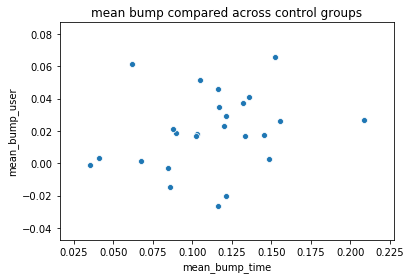

In [10]:
df_bump = df_time.join(df_user)
ax = sns.scatterplot(x='mean_bump_time',y='mean_bump_user',data=df_bump);
ax.set_title('mean bump compared across control groups')
#plt.savefig("results/compare_controls.jpg")

In [11]:
spending = pd.read_csv("../data/raw/tpl/spending_2019.csv")
spending = spending.iloc[:100]
cols = [x.lower().strip().replace(" ","_") for x in spending.columns.values]
spending.columns = cols
spending['st'] = [x[-2:] for x in spending.city]
spending['city_'] = [x[:x.find(',')].replace(" ", "_") for x in spending.city]
spending['st_city'] = spending.st + "_" + spending.city_
per_capita = spending[['st_city','total_spending_per_resident']].set_index('st_city').copy()
df_bump_spend = df_bump.join(per_capita)
#df_bump_spend.drop(labels='IN_Indianapolis',inplace=True)
df_bump_spend['percapita_spend'] = [int(x[1:].strip()) for x in df_bump_spend.total_spending_per_resident]

In [12]:
np.mean(df_bump_spend.percapita_spend)

118.32

In [13]:
scores = pd.read_csv("../data/processed/tpl/parkscore_2018.csv", index_col='city')
city_index =[x[:-8] for x in scores.index.values]
scores['city'] = city_index
scores.set_index('city', inplace=True)
df_bump_spend = df_bump_spend.join(scores)

In [16]:
df_bump_spend.describe()

,mean_bump_time,mean_bump_user,percapita_spend,park_score_2018
count,25.000000,25.000000,25.000000,25.000000
mean,0.111580,0.019767,118.320000,51.620000
std,0.038334,0.023720,79.419624,17.487186
min,0.035547,-0.026176,37.000000,25.000000
25%,0.087587,0.002721,65.000000,37.200000
50%,0.116625,0.018764,87.000000,45.400000
75%,0.133691,0.034695,159.000000,67.000000
max,0.208550,0.065899,342.000000,81.900000


In [ ]:
#fig, ax = plt.subplots(figsize=(6,4))
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,6), sharey=True)
df_bump_spend.plot.scatter(x='percapita_spend', y='mean_bump_time',color='black',alpha=.5,ax=ax1);
ax1.set_xlabel("Park spending per capita ($)", fontsize=14)
ax1.set_ylabel("Sentiment Benefit", fontsize=14)
ax1.set_xlim(0,400)
ax1.set_ylim(-.05,.25)
ax1.hlines(0,0,400, lw=.5)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)


df_bump_spend.plot.scatter(x='park_score_2018', y='mean_bump_time',color='black',alpha=.5,ax=ax2);
ax2.set_xlabel("Park Score (Trust for Public Land)", fontsize=14)
#ax2.set_ylabel("Mean Change in Sentiment", fontsize=14)
ax2.set_xlim(0,100)
ax2.set_ylim(-.05,.25)
ax2.hlines(0,0,100, lw=.5)
ax2.yaxis.set_tick_params(labelleft=True)
#for tk in ax2.get_yticklabels():
  #      tk.set_visible(True)
ax2.tick_params(axis='x', labelsize=12);
ax2.tick_params(axis='y', labelsize=12)
plt.tight_layout()
plt.savefig('./figures/sentiment_parkscore_spend.png', dpi=300)

In [ ]:
#fig, ax = plt.subplots(figsize=(6,4))
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,6), sharey=True)
df_bump_spend.plot.scatter(x='percapita_spend', y='mean_bump_user',color='black',alpha=.5,ax=ax1);
ax1.set_xlabel("Park spending per capita ($)", fontsize=14)
ax1.set_ylabel("Sentiment Benefit", fontsize=14)
ax1.set_xlim(0,400)
ax1.set_ylim(-.05,.1)
ax1.hlines(0,0,400, lw=.5)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)


df_bump_spend.plot.scatter(x='park_score_2018', y='mean_bump_user',color='black',alpha=.5,ax=ax2);
ax2.set_xlabel("Park Score (Trust for Public Land)", fontsize=14)
#ax2.set_ylabel("Mean Change in Sentiment", fontsize=14)
ax2.set_xlim(0,100)
ax2.set_ylim(-.05,.1)
ax2.hlines(0,0,100, lw=.5)
ax2.yaxis.set_tick_params(labelleft=True)
#for tk in ax2.get_yticklabels():
  #      tk.set_visible(True)
ax2.tick_params(axis='x', labelsize=12);
ax2.tick_params(axis='y', labelsize=12)
plt.tight_layout()
plt.savefig('./figures/sentiment_user_parkscore_spend.png', dpi=300)

In [17]:
df_bump_spend.corr(method='spearman',)

,mean_bump_time,mean_bump_user,percapita_spend,park_score_2018
mean_bump_time,1.000000,0.327692,0.132333,-0.007692
mean_bump_user,0.327692,1.000000,0.310829,0.263846
percapita_spend,0.132333,0.310829,1.000000,0.883247
park_score_2018,-0.007692,0.263846,0.883247,1.000000


In [19]:
np.mean(df_bump_spend.mean_bump_time)

0.11157998842941254

In [20]:
df_bump_spend.sort_values(by='mean_bump_time')

,mean_bump_time,mean_bump_user,total_spending_per_resident,percapita_spend,park_score_2018
city,,,,,
MD_Baltimore,0.035547,-0.000849,$55,55,44.9
NC_Charlotte,0.040706,0.002992,$43,43,25.0
TX_El_Paso,0.062020,0.061574,$41,41,37.2
MA_Boston,0.067665,0.001417,$159,159,69.3
OH_Columbus,0.084448,-0.002684,$87,87,43.6
TX_Fort_Worth,0.085823,-0.014956,$66,66,35.2
CA_San_Jose,0.087587,0.021457,$75,75,61.6
DC_Washington,0.089839,0.018764,$240,240,81.9
TX_San_Antonio,0.102138,0.016795,$75,75,42.0
